**Materia: Visión por Computadora 1**

Alumno: Ezequiel Alejandro Caamaño

Cohorte: 18va.

Trabajo Práctico Nro. 1


*Parte 1 (imágenes en /white_patchy /coord_cromaticas):*

1.
Implementar el algoritmo de pasaje a coordenadas cromáticas para librarnos de las variaciones de contraste.

2.
Implementar el algoritmo White Patch para librarnos de las diferencias de color de iluminación.

3.
Mostrar los resultados obtenidos y analizar las posibles fallas (si es que las hay) en el caso de White patch.

▪
*Parte 2:*

1.
Para las imágenes img1_tp.png y img2_tp.png leerlas con OpenCV en escala de grisas y visualizarlas.

2.
Elija el numerode bins que crea conveniente y grafique su histograma, compare los histogramas entre si. Explicar lo que se observa, si tuviera que entrenar un modelo de clasificación/detección de imágenes, considera que puede ser de utilidad tomar como ‘features’ a los histogramas?

3.
Para la imagen segmentacion.png analice el histograma de los canales RGB. Segmente algunos de los elementos presentes en la imagen (agua, cielo, tierra) y muestre, aplicando mascaras, las regiones en imágenes separadas.

In [ ]:
from google.colab import drive
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt

# Montar Google Drive
# drive.mount('/content/drive')
# input_dir_chromatic = '/content/drive/MyDrive/VC1/TP1/coord_cromaticas'  # Ajusta la ruta si es diferente
# output_dir_chromatic = '/content/drive/MyDrive/VC1/TP1/resultados_cromaticas' # Ajusta la ruta si es diferente
# os.makedirs(output_dir_chromatic, exist_ok=True)

input_dir_chromatic = 'imagenes/coord_cromaticas'
output_dir_chromatic = 'resultados_cromaticas'
os.makedirs(output_dir_chromatic, exist_ok=True)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


1. Pasaje de RGB a coordenadas cromáticas

Imagen 'CoordCrom_1.png' convertida a coordenadas cromáticas y guardada en '/content/drive/MyDrive/VC1/TP1/resultados_cromaticas/chromatic_CoordCrom_1.png'


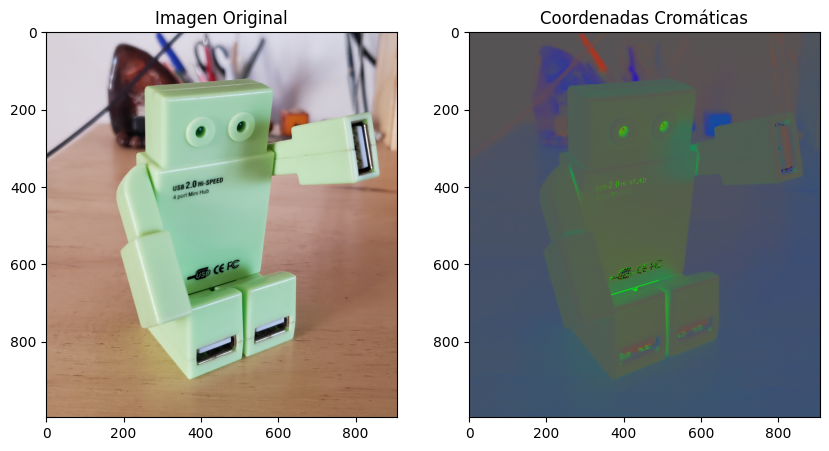

Imagen 'CoordCrom_2.png' convertida a coordenadas cromáticas y guardada en '/content/drive/MyDrive/VC1/TP1/resultados_cromaticas/chromatic_CoordCrom_2.png'


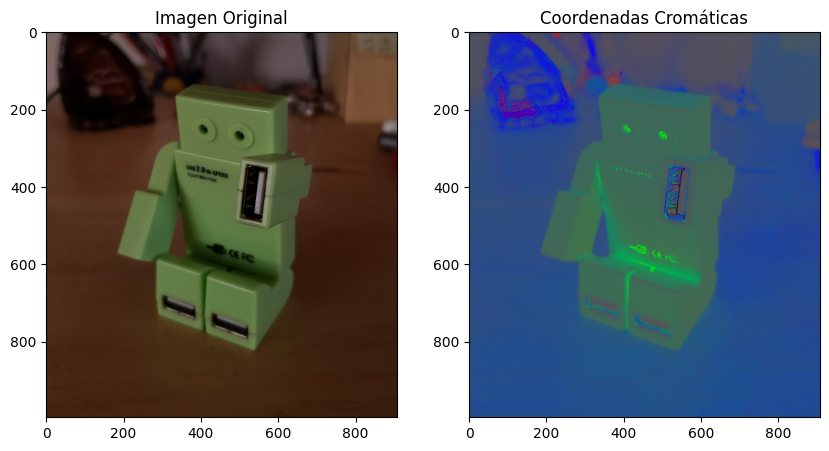

Imagen 'CoordCrom_3.png' convertida a coordenadas cromáticas y guardada en '/content/drive/MyDrive/VC1/TP1/resultados_cromaticas/chromatic_CoordCrom_3.png'


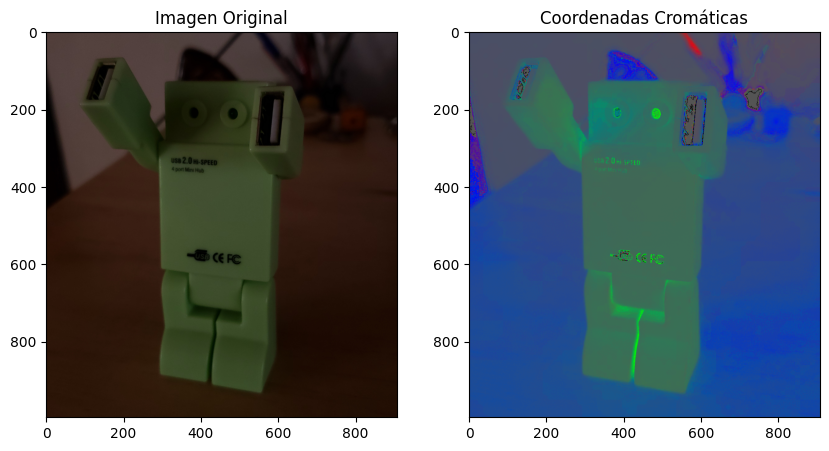

In [ ]:

def rgb_to_chromatic(image):
    """Convierte una imagen RGB a coordenadas cromáticas."""
    img_float = image.astype(np.float32) / 255.0
    sum_channels = np.sum(img_float, axis=2, keepdims=True)
    sum_channels[sum_channels == 0] = 1e-7
    chromatic_r = img_float[:, :, 0] / sum_channels[:, :, 0]
    chromatic_g = img_float[:, :, 1] / sum_channels[:, :, 0]
    chromatic_b = img_float[:, :, 2] / sum_channels[:, :, 0]
    chromatic = np.stack([chromatic_r, chromatic_g, chromatic_b], axis=-1)
    return chromatic

image_files_chromatic = [f for f in os.listdir(input_dir_chromatic) if f.endswith(('.png', '.jpg', '.jpeg'))]

for filename in image_files_chromatic:
    img_path = os.path.join(input_dir_chromatic, filename)
    image = cv2.imread(img_path)
    if image is not None:
        chromatic_image = rgb_to_chromatic(image)
        output_path = os.path.join(output_dir_chromatic, f'chromatic_{filename}')
        cv2.imwrite(output_path, (chromatic_image * 255).astype(np.uint8))
        print(f"Imagen '{filename}' convertida a coordenadas cromáticas y guardada en '{output_path}'")
        plt.figure(figsize=(10, 5))
        plt.subplot(1, 2, 1)
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
        plt.title('Imagen Original')
        plt.subplot(1, 2, 2)
        plt.imshow(chromatic_image, cmap='viridis')
        plt.title('Coordenadas Cromáticas')
        plt.show()
    else:
        print(f"No se pudo leer la imagen '{filename}'")

2. Implementaciòn de White Patch

Imagen 'wp_blue.jpg' corregida con White Patch y guardada en '/content/drive/MyDrive/VC1/TP1/resultados_whitepatch/whitepatch_wp_blue.jpg'


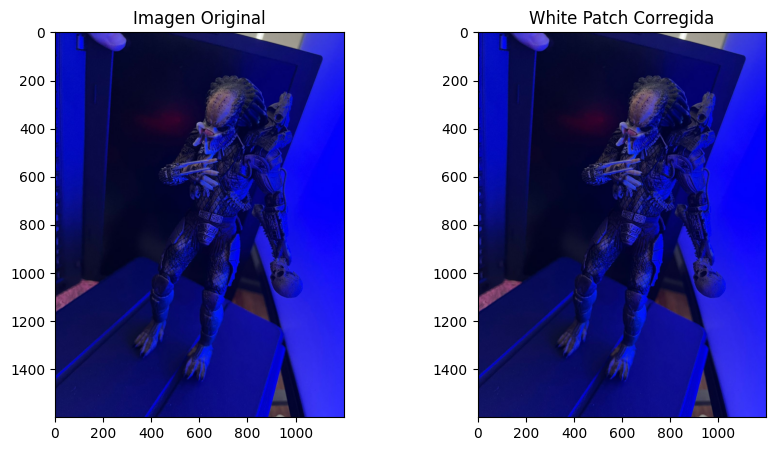

Imagen 'wp_red.png' corregida con White Patch y guardada en '/content/drive/MyDrive/VC1/TP1/resultados_whitepatch/whitepatch_wp_red.png'


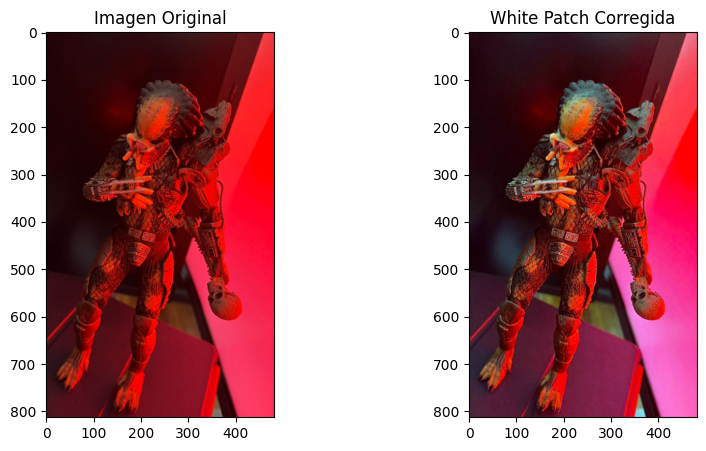

Imagen 'wp_red2.jpg' corregida con White Patch y guardada en '/content/drive/MyDrive/VC1/TP1/resultados_whitepatch/whitepatch_wp_red2.jpg'


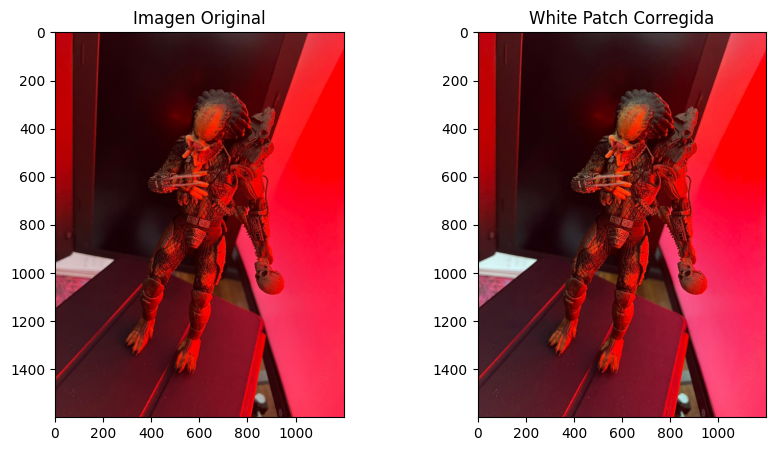

Imagen 'wp_green2.jpg' corregida con White Patch y guardada en '/content/drive/MyDrive/VC1/TP1/resultados_whitepatch/whitepatch_wp_green2.jpg'


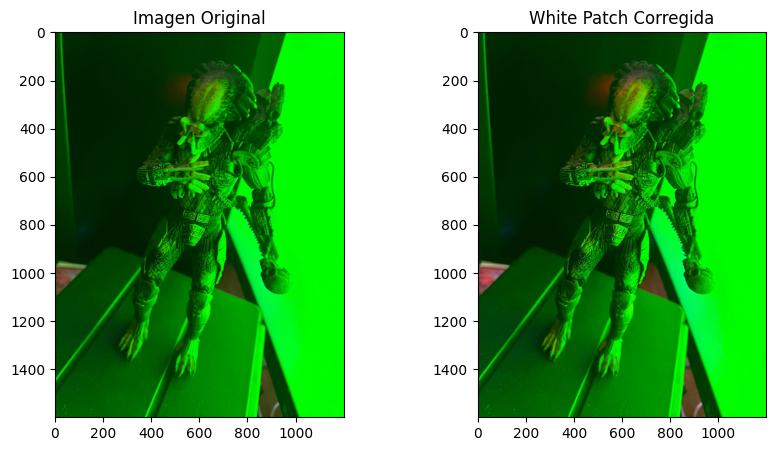

Imagen 'test_green.png' corregida con White Patch y guardada en '/content/drive/MyDrive/VC1/TP1/resultados_whitepatch/whitepatch_test_green.png'


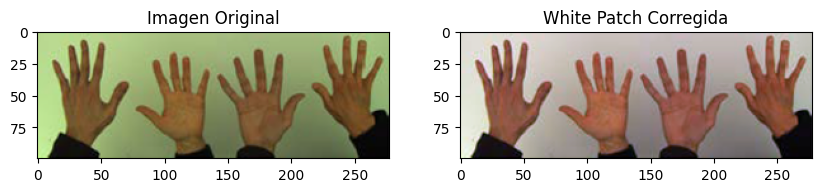

Imagen 'wp_green.png' corregida con White Patch y guardada en '/content/drive/MyDrive/VC1/TP1/resultados_whitepatch/whitepatch_wp_green.png'


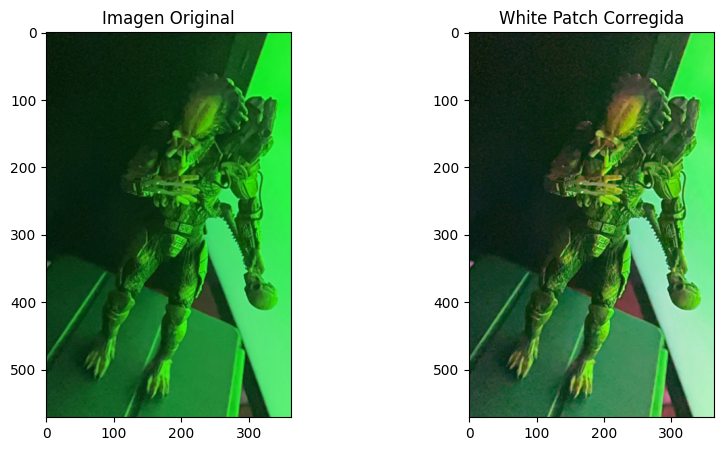

Imagen 'test_blue.png' corregida con White Patch y guardada en '/content/drive/MyDrive/VC1/TP1/resultados_whitepatch/whitepatch_test_blue.png'


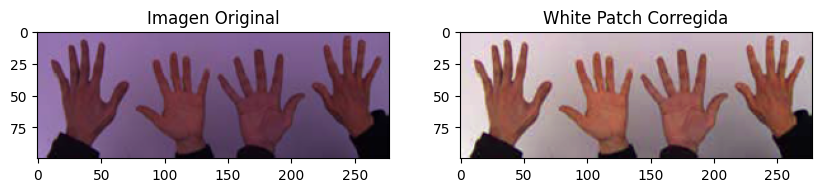

Imagen 'test_red.png' corregida con White Patch y guardada en '/content/drive/MyDrive/VC1/TP1/resultados_whitepatch/whitepatch_test_red.png'


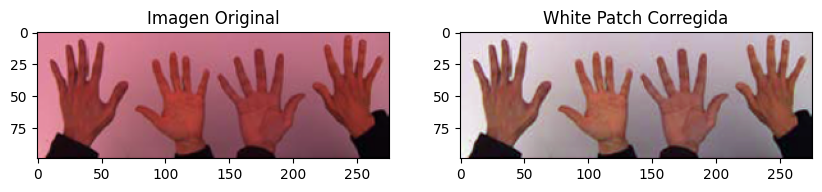

In [ ]:


# White Patch
# input_dir_whitepatch = '/content/drive/MyDrive/VC1/TP1/white_patch'  
# output_dir_whitepatch = '/content/drive/MyDrive/VC1/TP1/resultados_whitepatch'
# os.makedirs(output_dir_whitepatch, exist_ok=True)

# Las rutas ahora son relativas a la ubicación del notebook (tp1/)
input_dir_whitepatch = 'images/white_patch'
output_dir_whitepatch = 'resultados_whitepatch'
os.makedirs(output_dir_whitepatch, exist_ok=True)

def white_patch(image):
    img_float = image.astype(np.float32)
    max_r = np.max(img_float[:, :, 2])
    max_g = np.max(img_float[:, :, 1])
    max_b = np.max(img_float[:, :, 0])
    if max_r == 0: max_r = 1e-7
    if max_g == 0: max_g = 1e-7
    if max_b == 0: max_b = 1e-7
    normalized_r = img_float[:, :, 2] * (255.0 / max_r)
    normalized_g = img_float[:, :, 1] * (255.0 / max_g)
    normalized_b = img_float[:, :, 0] * (255.0 / max_b)
    corrected_image = np.clip(np.stack([normalized_b, normalized_g, normalized_r], axis=-1), 0, 255).astype(np.uint8)
    return corrected_image

image_files_whitepatch = [f for f in os.listdir(input_dir_whitepatch) if f.endswith(('.png', '.jpg', '.jpeg'))]

for filename in image_files_whitepatch:
    img_path = os.path.join(input_dir_whitepatch, filename)
    image = cv2.imread(img_path)
    if image is not None:
        corrected_image = white_patch(image)
        output_path = os.path.join(output_dir_whitepatch, f'whitepatch_{filename}')
        cv2.imwrite(output_path, corrected_image)
        print(f"Imagen '{filename}' corregida con White Patch y guardada en '{output_path}'")
        plt.figure(figsize=(10, 5))
        plt.subplot(1, 2, 1)
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
        plt.title('Imagen Original')
        plt.subplot(1, 2, 2)
        plt.imshow(cv2.cvtColor(corrected_image, cv2.COLOR_BGR2RGB))
        plt.title('White Patch Corregida')
        plt.show()
    else:
        print(f"No se pudo leer la imagen '{filename}'")

Parte 2. **Histogramas**

In [ ]:
# Las rutas ahora son relativas a la ubicación del notebook (tp1/)
img1_path = 'images/img1_tp.png'
img2_path = 'images/img2_tp.png'
segmentation_path = 'images/segmentacion.png'

Visualización en escala de Grises

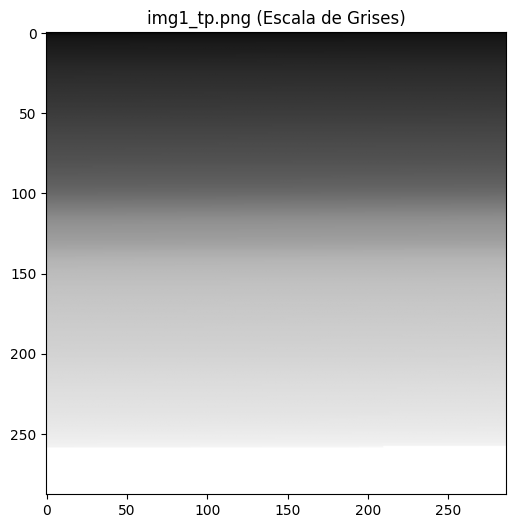

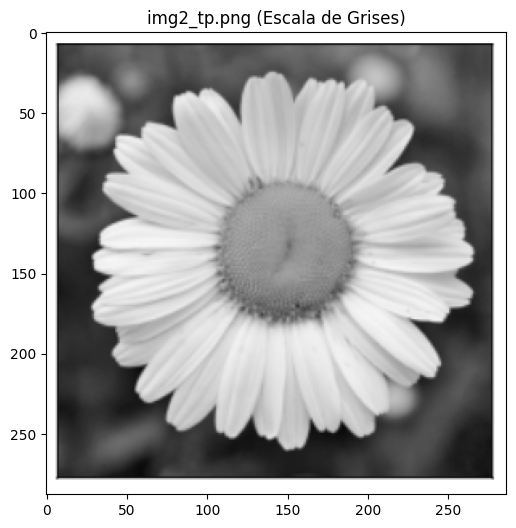

In [ ]:


img1_gray = cv2.imread(img1_path, cv2.IMREAD_GRAYSCALE)
if img1_gray is not None:
    plt.figure(figsize=(6, 6))
    plt.imshow(img1_gray, cmap='gray')
    plt.title('img1_tp.png (Escala de Grises)')
    plt.show()
else:
    print(f"No se pudo leer {img1_path}")

img2_gray = cv2.imread(img2_path, cv2.IMREAD_GRAYSCALE)
if img2_gray is not None:
    plt.figure(figsize=(6, 6))
    plt.imshow(img2_gray, cmap='gray')
    plt.title('img2_tp.png (Escala de Grises)')
    plt.show()
else:
    print(f"No se pudo leer {img2_path}")

## **Histogramas**

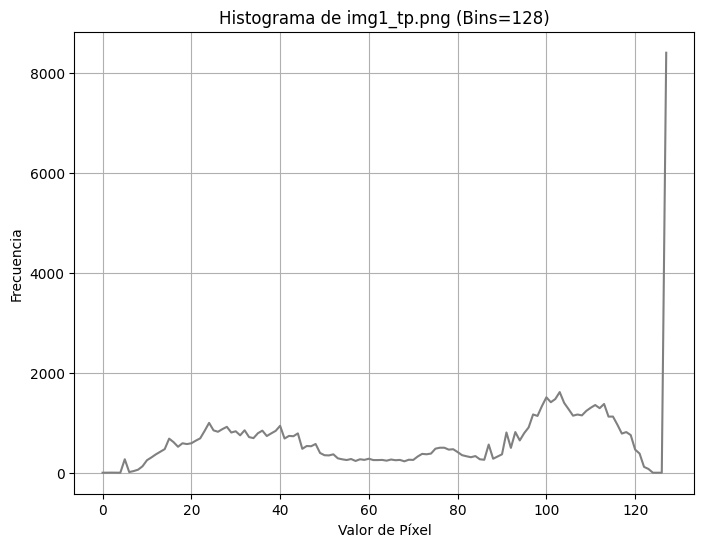

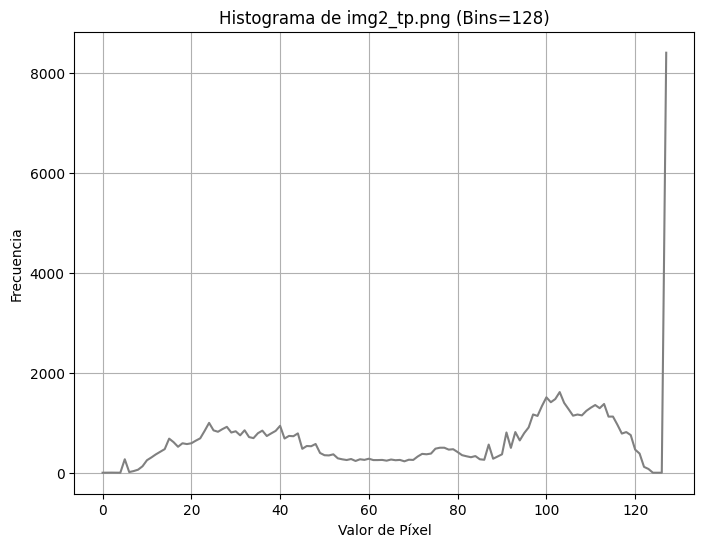

In [ ]:

def plot_histogram(image, title, bins=256):
    histogram = cv2.calcHist([image], [0], None, [bins], [0, 256])
    plt.figure(figsize=(8, 6))
    plt.plot(histogram, color='gray')
    plt.title(f'Histograma de {title} (Bins={bins})')
    plt.xlabel('Valor de Píxel')
    plt.ylabel('Frecuencia')
    plt.grid(True)
    plt.show()

num_bins = 128
if img1_gray is not None:
    plot_histogram(img1_gray, 'img1_tp.png', bins=num_bins)
if img2_gray is not None:
    plot_histogram(img2_gray, 'img2_tp.png', bins=num_bins)


**Los Histogramas como features**

 cubriendo un rango más amplio de intensidades.
            Imágenes con diferentes tonalidades generales (aunque el contenido sea similar) podrían tener histogramas desplazados hacia diferentes rangos de intensidad. Al capturar la distribuciòn global de las intensidades de los pixeles en cada canal, puede proporcionar informaciòn sobre la cantidad de cada nivel o color sin tener encuenta su ubicaciòn espacial. Histogramas diferentes en terminos de formas, rango de valores predominantes o dispersión, podrían utilizarse como features. Hay que destacar la falta de información espacial.

**Segmentación**

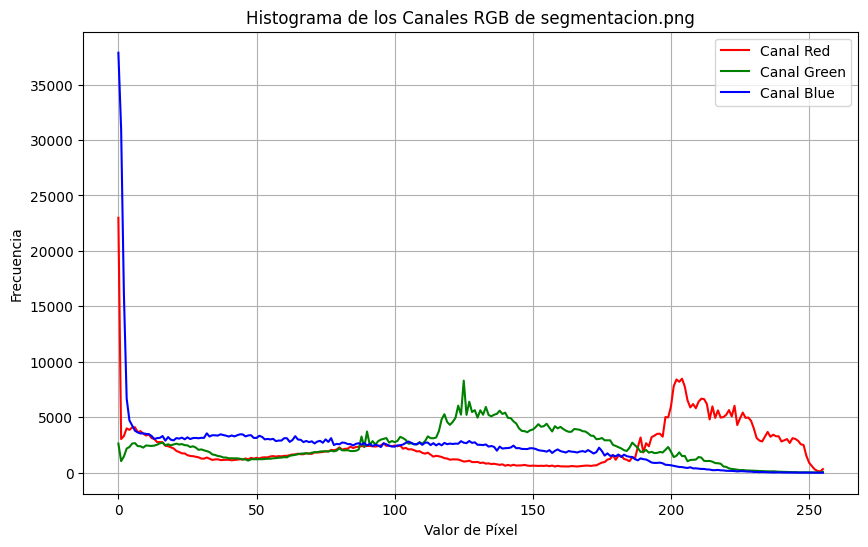

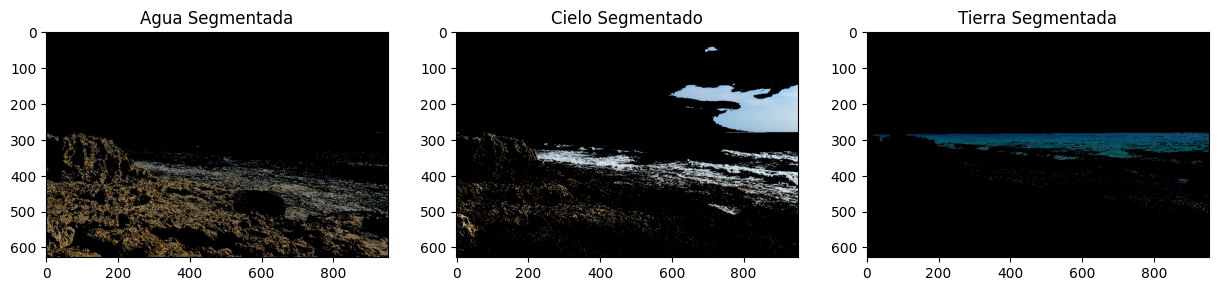

In [ ]:

segmentation_img = cv2.imread(segmentation_path)
if segmentation_img is not None:
    segmentation_img_rgb = cv2.cvtColor(segmentation_img, cv2.COLOR_BGR2RGB)
    colors = ('red', 'green', 'blue')
    plt.figure(figsize=(10, 6))
    for i, color in enumerate(colors):
        histogram = cv2.calcHist([segmentation_img], [i], None, [256], [0, 256])
        plt.plot(histogram, color=color, label=f'Canal {color.capitalize()}')
    plt.title('Histograma de los Canales RGB de segmentacion.png')
    plt.xlabel('Valor de Píxel')
    plt.ylabel('Frecuencia')
    plt.legend()
    plt.grid(True)
    plt.show()


    lower_blue = np.array([50, 50, 100])
    upper_blue = np.array([150, 150, 255])
    mask_agua = cv2.inRange(segmentation_img, lower_blue, upper_blue)
    agua = cv2.bitwise_and(segmentation_img_rgb, segmentation_img_rgb, mask=mask_agua)

    lower_cielo = np.array([100, 150, 150])
    upper_cielo = np.array([255, 255, 255])
    mask_cielo = cv2.inRange(segmentation_img, lower_cielo, upper_cielo)
    cielo = cv2.bitwise_and(segmentation_img_rgb, segmentation_img_rgb, mask=mask_cielo)

    lower_tierra_verde = np.array([0, 100, 0])
    upper_tierra_verde = np.array([100, 255, 100])
    mask_tierra_verde = cv2.inRange(segmentation_img, lower_tierra_verde, upper_tierra_verde)
    lower_tierra_marron = np.array([50, 20, 0])
    upper_tierra_marron = np.array([150, 100, 50])
    mask_tierra_marron = cv2.inRange(segmentation_img, lower_tierra_marron, upper_tierra_marron)
    mask_tierra = cv2.bitwise_or(mask_tierra_verde, mask_tierra_marron)
    tierra = cv2.bitwise_and(segmentation_img_rgb, segmentation_img_rgb, mask=mask_tierra)

    plt.figure(figsize=(15, 5))
    plt.subplot(1, 3, 1)
    plt.imshow(agua)
    plt.title('Agua Segmentada')
    plt.subplot(1, 3, 2)
    plt.imshow(cielo)
    plt.title('Cielo Segmentado')
    plt.subplot(1, 3, 3)
    plt.imshow(tierra)
    plt.title('Tierra Segmentada')
    plt.show()

else:
    print(f"No se pudo leer {segmentation_path}")